# CLustering

--------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd  # for manibulating the data
import re   # for regular expression
import string 
from collections import Counter  # to get the most common words in a string 
import nltk  # to remove stop words 
#nltk.download('stopwords')

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def readBooks(bookLst):
    "this function return a list of book that you have already given it its names as a parameter"
    # so it return list of lists_of sentences 
    data = []
    for b in bookLst:
        with open(b+".txt",encoding = "ISO-8859-1") as f:
            data.append (f.readlines())
    return data

In [3]:
def compineToParagraph(list_of_text):
    "Takes a list of statments and combines them into one large chunk of text"
    paragraph = ' '.join(list_of_text)
    return paragraph

In [4]:
def toListOfBooks(lstOfSentences):
    "it takes a list os list_of_sentences and return a list of strings"
    txtBooks =[]
    for i in lstOfSentences :
        txtBooks.append(compineToParagraph(i))
    return txtBooks

In [5]:
def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.
    Get rid of some additional punctuation and non-sensical text
    '''
    
    text = text.lower()  # Make text lowercase
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation 
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('[‘’“”…]', '', text) # Get rid of some additional punctuation 
    text = re.sub('\n', '', text)   
    return text

In [6]:
def toCleanListOfBooks(lstOfDirtyBooks):
    cleanedBooks =[]
    for i in lstOfDirtyBooks :
        cleanedBooks.append(clean_text(i))
    return cleanedBooks

In [7]:
def getPart(txt,bookName,start,end,words):
    """
    it extract a specific paragraph from a large text depending on a starting and ending indexs ,
    it return Book_name and the part
    """
    lst1 = txt.split() 
    l2=[]
    c = 0
    for i in range(start,end+1):
        if c<words:
            l2.append(lst1[i])
            c+=1
        else :
            txtPart = compineToParagraph(l2)
            return bookName,txtPart


In [8]:
def divideBooks(lstOfBookNames,lstOfCleanedBooks,lstOfPartitions,numberOfWords):
    parts =[]
    bookNames = []
    for m in range(len(lstOfBookNames)):
        str1= lstOfCleanedBooks[m] # to get the text from the book 
        bookName = lstOfBookNames[m]    # to get the book name
        start = 0  # from word zero 
        end = numberOfWords  # to word 100 
        for i in range(lstOfPartitions[m]):
            bookName,part = getPart(str1,bookName,start,end,numberOfWords)
            parts.append(part)
            bookNames.append(bookName)
            start += numberOfWords
            end += numberOfWords  
    return parts , bookNames

In [9]:
def dividLstOfBooksIntoParts (namesLst,partitionsLst,numberOfwords):
    '''
    namesLst : list of book names to read 
    partitionsLst : number of required partitions from each book 
    numberOfwords : number of words in each part
    it return a dataFrame containing the text and the label
    '''
    bookNamesLst = namesLst  # list of book names 
    bookLst = readBooks(bookNamesLst)  # list of list_of_sentence
    txtBooks =toListOfBooks(bookLst)   # list of strings
    cleanedBooks = toCleanListOfBooks(txtBooks)  # list of cleaned strings 
    

    #remove stop word in each book 
    cleanedBooks= removeStopWords(cleanedBooks)
    
#     #visuaizing each book words
#     visualize2(cleanedBooks,bookNamesLst)
    
#     #print the most common word in each book 
#     mostCommon(cleanedBooks,bookNamesLst)
    
    parts , bookNames=divideBooks(bookNamesLst,cleanedBooks,partitionsLst,numberOfwords)
    book_names = pd.Series(bookNames)
    text = pd.Series(parts)
    df = pd.DataFrame({ 'text': text,'book_names': book_names })
    
    # shuffle the rows of a dataframe
    shuffled = df.sample(frac=1).reset_index(drop=True)

    return shuffled

In [10]:
def checkNumberOfWords(dframe):
    "it take a dataframe and check number of words in each row and return a new dataFrame"
    df = dframe
    total_list = []
    for i in range(len(df.index)):
        txt = df.iloc[i,0]
        lst = txt.split()
        totals = len(lst)
        total_list.append(totals)

    df['totalWords'] =  total_list
    return df

In [11]:
def mostCommon(bookLst,bookNamesLst):
    "it take a list of books-string- and return most common words"
    for i in range(len(bookLst)):
        print(f"The most common words in book : {bookNamesLst[i]}")
        worsLst = bookLst[i].split() 
        words = [word.lower() for word in worsLst]
        c = Counter(words)
        print(c.most_common(10))


In [12]:
def removeStopWords(bookLst):
    "it take a list of cleaned strings and remove the stop words in each one"
    stopwords = nltk.corpus.stopwords.words('english')
    veryCleaned = []
    for b in bookLst:
        bookWords = b.split()
        words = [word.lower() for word in bookWords if word.lower() not in stopwords]
        book = compineToParagraph(words)
        veryCleaned.append(book)
    return veryCleaned

In [13]:
#!pip install wordcloud
from wordcloud import WordCloud 

def visualize2(bookLst,booksNames):
    for b in range(len(bookLst)):
        print(f"Book : {booksNames[b]}")
        myWordCloud = WordCloud().generate(bookLst[b])
        plt.figure(figsize=(15,10))
        plt.imshow(myWordCloud,interpolation='bilinear')
        plt.axis('off')
        plt.show()

--------------------------------------------------------------------------------------------------------------------

### `bag of words`

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def getBOW(train_corpus,trans = False,X=[""]):
    "it take train  corpus and return train  features"
    # build BOW features on train articles
    cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
    if trans == True:
        cv.fit_transform(X)
        cv_train_features = cv.transform(train_corpus)
    else :
        cv_train_features = cv.fit_transform(train_corpus)  
    return cv_train_features , cv.get_feature_names()

### `Bag of N-Grams Model`

In [15]:
def getNGram(n,train_corpus,trans = False,X=[""]):
    "it take train  corpus and return train  features"
    # build BOW features on train articles
    bv = CountVectorizer(ngram_range=(n,n))
    if trans == True:
        bv.fit_transform(X) 
        bv_train_features = bv.transform(train_corpus)
    else :
        bv_train_features = bv.fit_transform(train_corpus)  
    return bv_train_features , bv.get_feature_names()

### `TF-IDF Model`

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

def getTF_IDF(train_corpus,trans = False,X=[""]):
    "it take train corpus and return train features"
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    if trans == True:
        tv.fit_transform(X)
        tv_train_features = tv.transform(train_corpus)
    else :
        tv_train_features = tv.fit_transform(train_corpus)
    return tv_train_features  , tv.get_feature_names()

### `Bert`

In [17]:
# %%capture
# !pip install pytorch_pretrained_bert
# !pip install tensorflow

In [18]:
# %%capture

# # Import Libraries
# import tensorflow as tf
# import torch
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# from pytorch_pretrained_bert import BertTokenizer, BertModel
# from keras.preprocessing.sequence import pad_sequences
# import pandas as pd
# import io
# import numpy as np
# import matplotlib.pyplot as plt

# %matplotlib inline

# from pytorch_pretrained_bert import BertTokenizer # You will need this module

In [19]:
# def getBertFeatures(sentences):
#     # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
#     sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
#     # Initialize the tokenizer
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#     tokenized_texts = []
#     # Tokenize the sentences and put them in the list tokenized_texts
#     tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
#     input_ids = []
#     # Convert the tokens to their index numbers (input_ids) in the BERT vocabulary
#     input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
#     # create attention mask 
    
#     # Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
#     # In the original paper, the authors used a length of 512.
#     MAX_LEN = 128
#     # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
#     input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
#     # Pad our input tokens
#     input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
#     # Create attention masks
#     attention_masks = []

#     # Create a mask of 1s for each token followed by 0s for padding
#     for seq in input_ids:
#         seq_mask = [float(i>0) for i in seq]
#         attention_masks.append(seq_mask)
#     # Conver the ids into a tensor representation
#     batch_size = 8
#     input_tensor = torch.tensor(input_ids)
#     masks_tensor = torch.tensor(attention_masks)
#     train_data = TensorDataset(input_tensor, masks_tensor)
#     dataloader = DataLoader(train_data, batch_size=batch_size)
    
#     # bert model
    
#     # Initialize the model
#     model = BertModel.from_pretrained("bert-base-uncased").to('cuda')
    
    
#     model.eval()
#     outputs = []
#     for input, masks in dataloader:
#         torch.cuda.empty_cache() # empty the gpu memory

#         # Transfer the batch to gpu
#         input = input.to('cuda')
#         masks = masks.to('cuda')

#         # Run inference on the batch
#         output = model(input, output_all_encoded_layers=False, attention_mask=masks)[0]

#         # Transfer the output to CPU again and convert to numpy
#         output = output.cpu().detach().numpy()

#         # Store the output in a list
#         outputs.append(output)

#     # Concatenate all the lists within the list into one list
#     outputs = [x for y in outputs for x in y]
    
#     return np.mean(outputs,axis=2)

### `LDA`

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def get_LDA(X,components):
    """
    input  : X is the train text , components is the number of topics 
    output : features as a dataframe
    """
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = count_vect.fit_transform(X)
    LDA = LatentDirichletAllocation(n_components=components, random_state=42)
    LDA.fit(doc_term_matrix)
    topic_values = LDA.transform(doc_term_matrix)
    pd.options.display.float_format = '{:,.3f}'.format
    dt_df = pd.DataFrame(topic_values,columns=['T'+str(i) for i in range(1, components+1)])
    return dt_df

---------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

## `modeling`

In [21]:
import numpy as np

### `k-means`

In [22]:
# K means 
from sklearn.cluster import KMeans

def build_k_means(features,n_clusters):
    model = KMeans(n_clusters,init='k-means++', max_iter=100, n_init=1)
    label = model.fit_predict(features)
    return model,label 

In [23]:
def print_top_cluster_fName(topn_features,names,model,cls_num):
    """
    input  : nummber of the top words to be presented , features names , model , number of clusters 
    output : print the top words in each cluster  
    """
    ordered_centroids = model.cluster_centers_.argsort()[:, ::-1]

    # get key features for each cluster
    for cluster_num in range(cls_num):
        print('CLUSTER #'+str(cluster_num+1))
        print(" ")
        key_features = [names[index] for index in ordered_centroids[cluster_num, :topn_features]]
        print('Key Features:')
        print(key_features) 
        print('='*100)

In [24]:
from sklearn.mixture import GaussianMixture
def em_model(x, num_components):
    """
    INPUT:
    x: The training data
    num_components: The number of mixture components.

    OUTPUT:
    model: Gaussian mixture model after fitting it with the training data

    """
    model = GaussianMixture(n_components=num_components,covariance_type='diag', random_state=0)
    
    model.fit(x)
    
    return model 

------------------------------------------------------------------------------------------------------------

## Run the code 

### `loading the data`

In [25]:
bookNamesLst = ['wisdom','parents','lost','leaves','emma'] 
df= dividLstOfBooksIntoParts(bookNamesLst,[200,200,200,200,200],100)
# print(df)
# checkNumberOfWords(df)

df

,text,book_names
0,churchillââi remember perfectlyâ âhow ...,emma
1,end sheet one might one rest eager drawn could...,emma
2,cried jem threw arm lightfoots neck hiding fac...,parents
3,revive though lie grovelling prostrate yon lak...,lost
4,irregular main street place may inferred conta...,emma
...,...,...
995,purposed foe could pity thus forlorn though un...,lost
996,exposed everthreatening storms chaos blusterin...,lost
997,father pure empyrean sits high thronâd hight...,lost
998,inured feel changed length place conformed tem...,lost


### `derive feature and label from the data`

In [26]:
X = df.text
y = df.book_names

### print the top 15 word in the entire dataset 

In [27]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])
    count_vectorizer = CountVectorizer(stop_words='english')

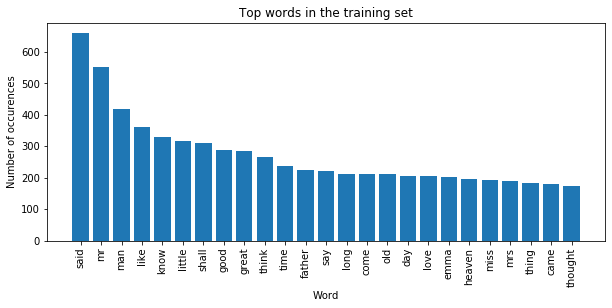

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=X)

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in the training set');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

### `feature extraction`

In [29]:
cv_train_features  , cv_names= getBOW(X)
tv_train_features  , tv_names= getNGram(2,X)
bv_train_features  , bv_names= getTF_IDF(X)
LDA_train_features           = get_LDA(X,20)
#brt_train_feature = getBertFeatures(X)
print('BOW   model:-> Train features shape:', cv_train_features.shape)
print('NGram model:-> Train features shape:', tv_train_features.shape)
print('TFIDF model:-> Train features shape:', bv_train_features.shape)
print('LDA   model:-> Train features shape:', LDA_train_features.shape)

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


BOW   model:-> Train features shape: (1000, 17702)
NGram model:-> Train features shape: (1000, 89772)
TFIDF model:-> Train features shape: (1000, 17702)
LDA   model:-> Train features shape: (1000, 20)


### `use models`

### `number of clusters`

In [30]:
def kmeans_model(x, num_clusters):
    """
    INPUT:
    x: The training data
    num_clusters: The number of clusters

    OUTPUT:
    model: K-means model after fitting it with the training data

    """
    model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
    model.fit(x)
    return model

In [31]:
from sklearn.metrics import silhouette_score
def plot_kmeans_elbow(x, max_clusters, features_name):
    """
    The function takes the training data and plot WCSS and silhouette versus the number of clusters

    INPUT:
    x: The training data
    max_clusters: The maximum number of clusters
    features_name: The name of used features that will appear in the title of the plot 

    """
    wcss = []
    s = []
    for i in range(1, max_clusters+1):
        model = kmeans_model(x, i)
        wcss.append(model.inertia_)
        if i>1:
            s.append(silhouette_score(x, model.labels_))

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('Elbow Method using ' + features_name + ' features')

    sub1 = plt.subplot(1, 2, 1)
    sub1.plot(range(1, max_clusters+1), wcss)
    sub1.set_xlabel('Number of clusters')
    sub1.set_ylabel('WCSS')

    sub2 = plt.subplot(1, 2, 2)
    sub2.plot(range(2, max_clusters+1), s)
    sub2.set_xlabel('Number of clusters')
    sub2.set_ylabel('silhouette')

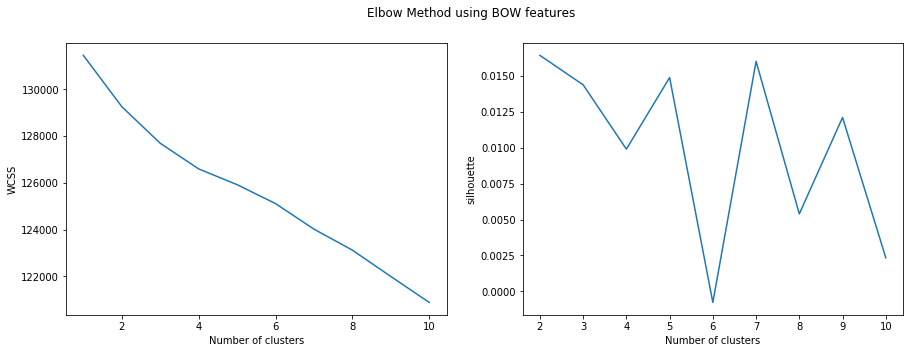

In [32]:
plot_kmeans_elbow(cv_train_features,10,"BOW")

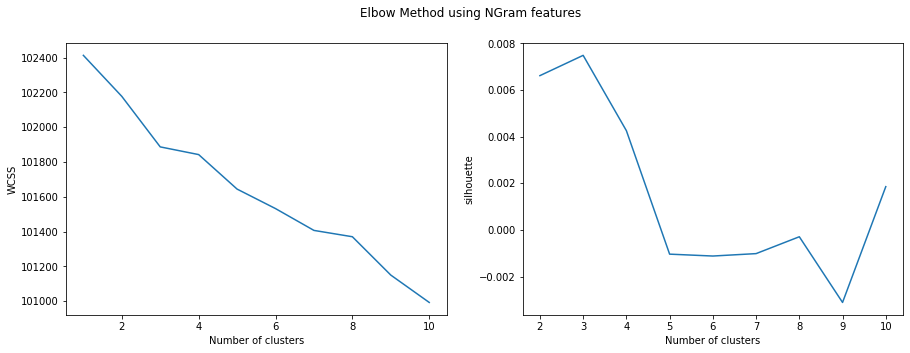

In [33]:
plot_kmeans_elbow(tv_train_features,10,"NGram")

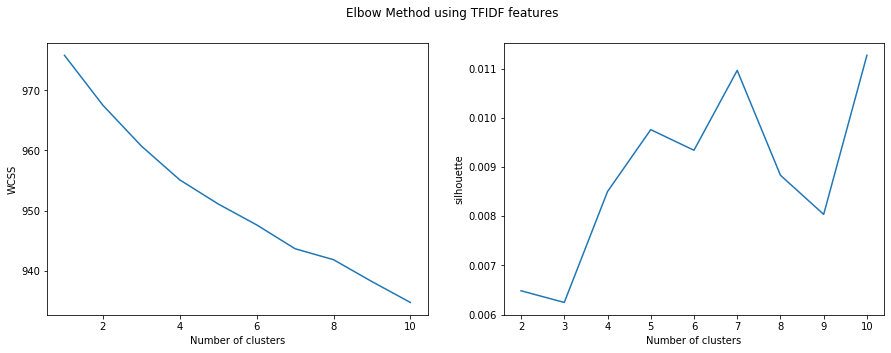

In [34]:
plot_kmeans_elbow(bv_train_features,10,"TFIDF")

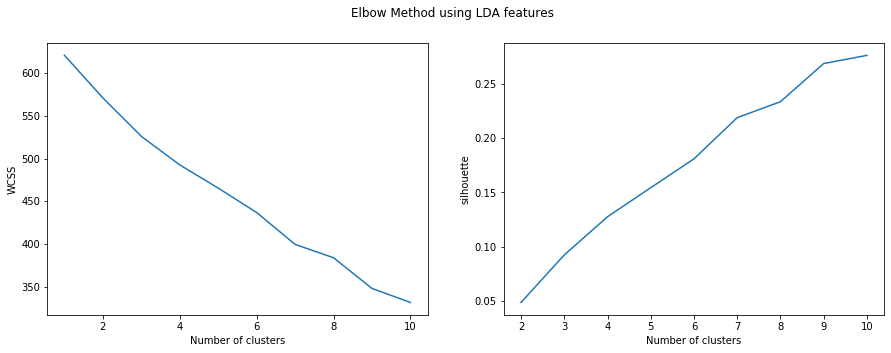

In [35]:
plot_kmeans_elbow(LDA_train_features,10,"LDA")

-------------------------------------------------------------------------------------------------------------------

In [36]:
clusters = 4

In [37]:
LDA_train_features

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
0,0.001,0.001,0.498,0.001,0.001,0.001,0.001,0.001,0.001,0.490,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.288,0.001,0.001,0.699,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,0.001,0.001,0.001,0.001,0.489,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.180,0.001,0.321,0.001,0.001,0.001,0.001
3,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.157,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.831,0.001,0.001,0.001,0.001
4,0.001,0.001,0.001,0.987,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.001,0.001,0.001,0.001,0.001,0.001,0.713,0.276,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
996,0.001,0.001,0.150,0.001,0.001,0.001,0.001,0.401,0.001,0.438,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
997,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.488,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.501
998,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.519,0.470,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [38]:
# k means with LDA features 
model , label = build_k_means(LDA_train_features,clusters)

In [39]:
# k means with BOW features 
model3 , label2 = build_k_means(cv_train_features,clusters)
print_top_cluster_fName(10,cv_names,model3,clusters)

CLUSTER #1
 
Key Features:
['said', 'one', 'see', 'man', 'like', 'would', 'could', 'know', 'little', 'upon']
CLUSTER #2
 
Key Features:
['mr', 'could', 'would', 'emma', 'much', 'harriet', 'must', 'said', 'one', 'miss']
CLUSTER #3
 
Key Features:
['heaven', 'thou', 'thy', 'shall', 'thus', 'thee', 'yet', 'though', 'us', 'god']
CLUSTER #4
 
Key Features:
['chapter', 'ebook', 'emma', 'volume', 'iii', 'ii', 'viii', 'gutenberg', 'project', 'vi']


In [40]:
# k means with n-gram features 
model , label4 = build_k_means(cv_train_features,clusters)
print_top_cluster_fName(3,cv_names,model,clusters)

CLUSTER #1
 
Key Features:
['heaven', 'thou', 'see']
CLUSTER #2
 
Key Features:
['one', 'man', 'like']
CLUSTER #3
 
Key Features:
['said', 'jem', 'would']
CLUSTER #4
 
Key Features:
['mr', 'could', 'would']


------------------------------------------------------------------------------------------------------------------

### Em model 

In [41]:
model2 = em_model(LDA_train_features, 4)
# print_top_cluster_fName(10,bv_names,model2,clusters)

In [42]:
def em_model(x, num_components):
    """
    INPUT:
    x: The training data
    num_components: The number of mixture components.

    OUTPUT:
    model: Gaussian mixture model after fitting it with the training data

    """
    model = GaussianMixture(n_components=num_components,covariance_type='diag', random_state=0)
    model.fit(x)
    return model

In [43]:
def plot_em_elbow(x, max_components, features_name):
    """
    The function takes the training data and plot AIC, BIC and silhouette versus the number of components

    INPUT:
    x: The training data
    max_components: The maximum number of components 
    features_name: The name of used features that will appear in the title of the plot 

    """
    s = []
    n_components = np.arange(1, max_components+1)
    models = [em_model(x, n) for n in n_components]
    for i in range(2, max_components+1):
        model = em_model(x, i)
        labels = model.predict(x)
        s.append(silhouette_score(x, labels))

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('Elbow Method using ' + features_name + ' features')
    sub1 = plt.subplot(1, 2, 1)
    sub1.plot(n_components, [m.bic(x) for m in models], label='BIC')
    sub1.plot(n_components, [m.aic(x) for m in models], label='AIC')
    sub1.set_xlabel('Number of components')
    sub1.legend(loc='best')

    sub2 = plt.subplot(1, 2, 2)
    sub2.plot(range(2, max_components+1), s)
    sub2.set_xlabel('Number of clusters')
    sub2.set_ylabel('silhouette')

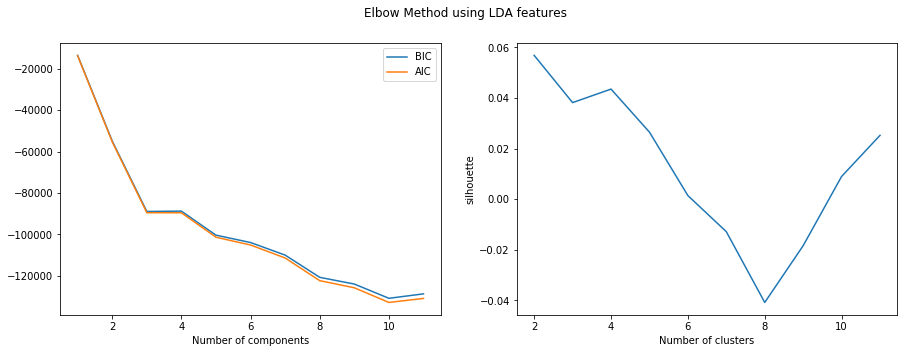

In [44]:
plot_em_elbow(LDA_train_features,11, "LDA")

--------------------------------------------------------------------------------------------------------------------

In [45]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# pyLDAvis.enable_notebook()
def visualizeTopics(X,N_topics):
    """
    input  : take the corpus as a text , number of topics 
    output : visualize the lda topics , and return the coherence 
    """
    pyLDAvis.enable_notebook()
    # get list of ( list of words ) from the corpus 
    texts = []
    for x in X :
        texts.append(x.split(" "))
    # get the dictionary 
    dictionary = Dictionary(texts)
    # prepare the features for LDA model 
    corpus = [dictionary.doc2bow(text) for text in texts]  # text is a list of lists [[word1,word2,...,wordn],...,[word1,word2,...,wordn]]
    
    # build LDA model 
    goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=N_topics)
    
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    
    goodcm2 = CoherenceModel(model=goodLdaModel, texts=texts, dictionary=dictionary, coherence='c_v')

    # feed the LDA model into the pyLDAvis instance
    lda_viz = gensimvis.prepare(goodLdaModel, corpus, dictionary)
    return lda_viz,goodcm.get_coherence(),goodcm2.get_coherence()
    

/home/amjad/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [46]:
lda_viz,coherence , c = visualizeTopics(X,7)

/home/amjad/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [47]:
coherence

-1.7072825238614058

In [48]:
c

0.37620908095385647

In [49]:
lda_viz

PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
2      0.035  0.006       1        1 22.795
1      0.017  0.002       2        1 19.344
0     -0.022  0.023       3        1 14.464
5     -0.012  0.002       4        1 12.950
6      0.012  0.003       5        1 12.798
3     -0.023 -0.000       6        1 10.058
4     -0.007 -0.036       7        1  7.591, topic_info=         Term    Freq   Total Category  logprob  loglift
137       see 295.000 295.000  Default   30.000   30.000
40         mr 498.000 498.000  Default   29.000   29.000
2474  chapter  61.000  61.000  Default   28.000   28.000
378     shall 256.000 256.000  Default   27.000   27.000
545     susan  94.000  94.000  Default   26.000   26.000
...       ...     ...     ...      ...      ...      ...
620      time  14.761 209.126   Topic7   -6.243   -0.073
113      know  16.550 279.347   Topic7   -6.128   -0.248
42       much  14.989 261.435   Topic7   -6.227   -0.281
23     father  13.762 189.193   Topic7   -6.313   -0.043
116      like  14.494 302.861   Topic7   -6.261   -0.461

[630 rows x 6 columns], token_table=       Topic  Freq           Term
term                             
15471      5 0.638          abase
15472      5 0.638         abased
2769       1 0.104         absent
2769       2 0.519         absent
2769       5 0.104         absent
...      ...   ...            ...
80         4 0.081           âi
80         5 0.127           âi
80         6 0.087           âi
80         7 0.046           âi
16216      1 0.528  ââdrugger

[1540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 6, 7, 4, 5])

In [62]:
def get_clusters(text,pred_labels,N_clusters):
    clusters=[]
    for i in range(N_clusters):
        clusters.append(" ")
    for j in range(len(pred_labels)):
        cluster_number = pred_labels[j]
        clusters[cluster_number]= clusters[pred_labels[cluster_number]]+text[j]
    return clusters

def split_Cluster_corpuses(Lst_Str_clusters,N_clusters):
    clusters =[]
    for i in Lst_Str_clusters:
        clusters.append(i.split())
    return clusters

def coherence_for_all(lst,texts):
    # get list of ( list of words ) from the corpus 
    texts = []
    for x in X :
        texts.append(x.split(" "))
    # get the dictionary 
    dictionary = Dictionary(texts)

    # prepare the features for LDA model 
    # text is a list of lists [[word1,word2,...,wordn],...,[word1,word2,...,wordn]]
    corpus = [dictionary.doc2bow(text) for text in texts]  
    
    goodcm = CoherenceModel(topics=lst, corpus=corpus, dictionary=dictionary, coherence='u_mass')

    return goodcm.get_coherence()

def calculate_coherence(text,pred_labels,N_clusters):
    c = get_clusters(text,pred_labels,N_clusters)
    c2 =split_Cluster_corpuses(c,N_clusters) 
    lsts = []
    for i in range(N_clusters):
        lsts.append(c2[i])
    return coherence_for_all(lsts,text) 

In [63]:
calculate_coherence(X,label,4)

-2.2928771345580397

In [64]:
calculate_coherence(X,label2,4)

-1.6660088280396714

In [65]:
calculate_coherence(X,label4,4)

-2.2600060318379893